<a href="https://colab.research.google.com/github/abmcmillan/Computer-Vision-Introduction/blob/main/2024_06_13_RISC_ComputerVision_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RISC Summer Internship Demonstration June 2024

This CoLab notebook is designed to give a brief demonstration into some of the readily accessible capabilities of computer vision applications available to both experts and non-experts. An incredible amount of resources are available on GitHub, YouTube, and other common sites.

Please ask questions and explore on your own this exciting area. The two most popular deep learning frameworks are PyTorch (https://pytorch.org/) and Keras/TensorFlow (https://tensorflow.org/). If you want to see what you can do directly in these deep learning frameworks, you can start here: https://pytorch.org/examples/ or here: https://keras.io/examples/.

We will start with the popular "You Only Look Once" YOLO architecture implemented by Ultralytics in PyTorch (https://github.com/ultralytics/ultralytics). This framework has evolved from an object detection tool (detecting objects and their bounds within an image) into a tool that does object detection, semantic segmentation of an image (segmenting of different object), pose detection, and tracking. This tool is provided as initially trained on the COCO dataset with facilities to provide custom training.

---

Alan McMillan, PhD  
University of Wisconsin  
abmcmillan@wisc.edu  

In [3]:
# first, install YOLO
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


# Object Detection
Let's do an example of object detection in an image

In [4]:
# lets start with a simple example for object detection
# we can give the YOLO tool a local file or a web address
# and here we are calling the command line YOLO tool (we can do this in this within
# this notebook as below or from a command prompt if you are running Jupyter notebook
# on a local machine)
! yolo mode=predict task=detect model=yolov8n.pt save_txt save_conf exist_ok name='example1' source='https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg'

100% 6.23M/6.23M [00:00<00:00, 83.7MB/s]
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 197k/197k [00:00<00:00, 8.67MB/s]
WARNING ⚠️ NMS time limit 2.050s exceeded
image 1/1 /content/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg: 480x640 11 persons, 1 bicycle, 7 cars, 2 motorcycles, 1 truck, 1 traffic light, 368.3ms
Speed: 5.5ms preprocess, 368.3ms inference, 2772.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/example1
1 label saved to runs/detect/example1/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


In the `example1` folder there is a sub-folder `labels` which contains a text file which stores for each object detected, its class, a confidence in prediction, and the location of a bounding box.

Here are the first five lines of this file:
```
0 0.405748 0.545688 0.109717 0.398905 0.895639
0 0.28348 0.556874 0.0933392 0.356039 0.881168
0 0.101321 0.650908 0.133359 0.506478 0.86
0 0.0277055 0.613384 0.0554109 0.434047 0.796258
3 0.792999 0.609702 0.168179 0.257695 0.745829
```

The class 0 corresponds to `person` and class 3 corresponds to `motorcycle`. You can find more information about other labels in the COCO dataset here: https://docs.ultralytics.com/datasets/detect/coco/#dataset-yaml

The next number is the confidence in prediction provided by YOLO.

The remaining four numbers are the coordinates of the bounding box in the following order: center location in x, center location in y, width, height.

We will discuss this output in more detail in just a little bit.


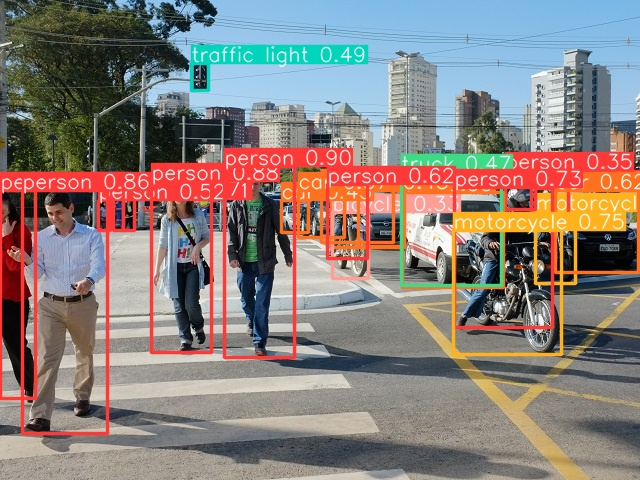

In [5]:
# let's display the image here in our Notebook
from pathlib import Path
from IPython.display import Image, display
# find the output file
image_file = list(Path('./runs/detect/example1').glob('Sao-Paulo*.jpg'))[0]
# display it
display(Image(filename=image_file))

In [6]:
# we can also do this directly from within Python
# (https://docs.ultralytics.com/models/yolov8/#supported-modes)
from ultralytics import YOLO
# Load the model
model = YOLO('yolov8m.pt')  # load a pretrained model

# Perform inference
results = model('https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg')

100%|██████████| 49.7M/49.7M [00:00<00:00, 206MB/s]



Found https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg locally at Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg
image 1/1 /content/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg: 480x640 12 persons, 7 cars, 3 motorcycles, 1 truck, 2 traffic lights, 1 handbag, 332.4ms
Speed: 6.4ms preprocess, 332.4ms inference, 1112.5ms postprocess per image at shape (1, 3, 480, 640)


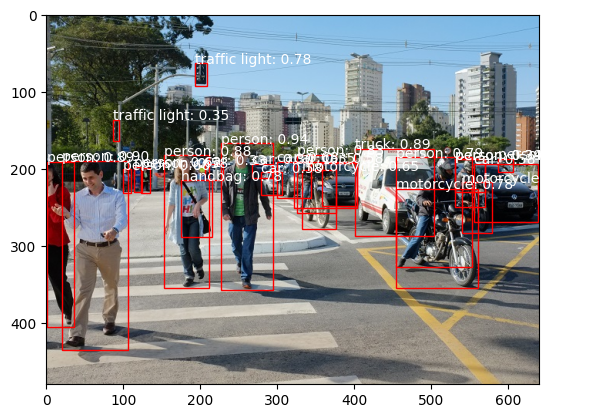

In [7]:
from matplotlib.figure import Bbox
# we can now do a simple plot from the detected bounding boxes, you could also do
# something more complicated here or leverage the existing code that is used to
# write the output file as above
import cv2
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1)
img = cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB)
ax.imshow( img )

# Iterate over detections and draw bounding boxes
for i,box in enumerate(results[0].boxes.cpu()):
    pltbox = plt.Rectangle((box.xyxy[0][0], box.xyxy[0][1]), box.xyxy[0][2]-box.xyxy[0][0], box.xyxy[0][3]-box.xyxy[0][1], fill=False, color='red')
    ax.add_patch(pltbox)
    pltlabel = f'{results[0].names[box.cls.item()]}: {box.conf.item():.2f}'
    plt.text(box.xyxy[0][0], box.xyxy[0][1], pltlabel, color='white' )
plt.show()

So let's talk a little bit more about the data format of the object detection system. For each object present in an image, there's a corresponding line in the text file. Each line represents one bounding box. The format of each line is as follows:

```
<object-class> <x_center> <y_center> <width> <height>
```
```<object-class>```: The class of the object. This is an integer where each integer represents a different type of identifiable object (for example, "0" might correspond to a car, "1" might correspond to a person, etc.). The class numbers are zero-indexed if there are multiple classes. In YOLOv8, the output class types can be seen in ```results[i].names```.

```<x_center> <y_center> <width> <height>```: These values are relative to the width and the height of the image. They all are floating point values ranging from 0 to 1.

```<x_center>, <y_center>```: These values represent the center of the bounding box containing the object, relative to the dimensions of the image.

```<width>, <height>```: These values represent the width and the height of the bounding box, also relative to the dimensions of the image.

In this format, the top left of the image is (0,0), and the bottom right of the image is (1,1). Note that during prediction, the results have the output boxes in the pixel units of the input image.

**We will need this if we want to add our own data to the model, which we will discuss later.**

# Semantic Segmentation
Let's explore the use of this framework to do segmentation instead of object detection. In this way, instead of a bounding box, we get a label for each pixel for its respective classification.

In [8]:
# let's use the command line YOLO tool (we can do this in this within this notebook as below
# or from a command prompt if you are running Jupyter notebook on a local machine)
! yolo mode=predict task=segment model=yolov8m-seg.pt save_txt save_conf exist_ok name='example2' source='https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg'

100% 52.4M/52.4M [00:00<00:00, 221MB/s]
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27268704 parameters, 0 gradients, 110.2 GFLOPs

Found https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg locally at Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg
image 1/1 /content/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg: 480x640 12 persons, 9 cars, 3 motorcycles, 1 truck, 1 traffic light, 2 handbags, 131.3ms
Speed: 2.3ms preprocess, 131.3ms inference, 637.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/example2
1 label saved to runs/segment/example2/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


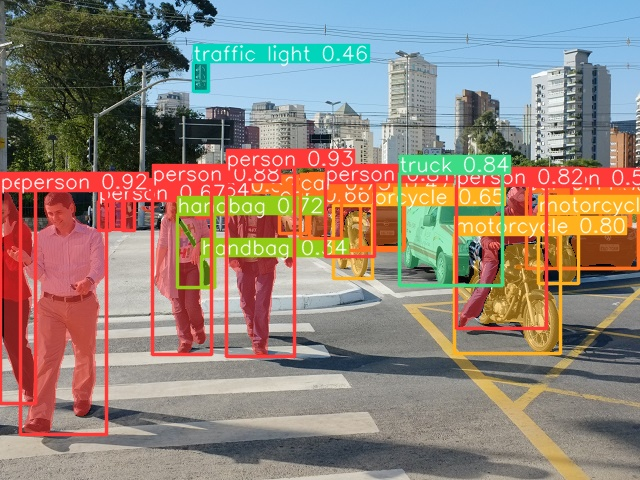

In [9]:
# find the output file and display it
image_file = list(Path('./runs/segment/example2').glob('Sao-Paulo*.jpg'))[0]
display(Image(filename=image_file))

Ok that looks cool, but it has hard to see what we have, let's change the option on YOLO to remove the boxes.

In [10]:
! yolo mode=predict task=segment model=yolov8n-seg.pt show_labels=false show_conf=false show_boxes=false save_txt save_conf exist_ok name='example3' source='https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg'

100% 6.73M/6.73M [00:00<00:00, 100MB/s]
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

Found https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg locally at Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg
image 1/1 /content/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg: 480x640 8 persons, 1 bicycle, 5 cars, 1 motorcycle, 1 truck, 1 traffic light, 2 handbags, 121.8ms
Speed: 2.4ms preprocess, 121.8ms inference, 585.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/example3
1 label saved to runs/segment/example3/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


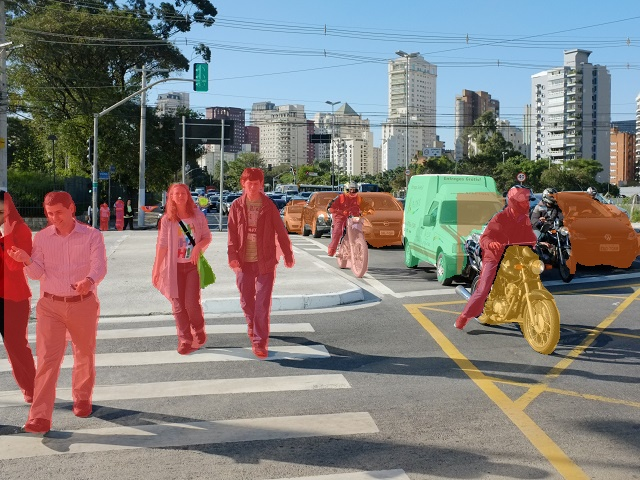

In [11]:
# find the output file and display it
image_file = list(Path('./runs/segment/example3').glob('Sao-Paulo*.jpg'))[0]
display(Image(filename=image_file))

Here we can see that the image missed a few objects. We are using the smallest model `yolov8n-seg` (https://docs.ultralytics.com/models/yolov8/#performance-metrics). Maybe if we try with a larger model, we will have a better result.

In [12]:
# As before, but now use the yolov8l-seg model
! yolo mode=predict task=segment model=yolov8l-seg.pt show_labels=false show_conf=false show_boxes=false save_txt save_conf exist_ok name='example4' source='https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg'

100% 88.1M/88.1M [00:00<00:00, 352MB/s]
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45973568 parameters, 0 gradients, 220.5 GFLOPs

Found https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg locally at Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg
image 1/1 /content/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg: 480x640 10 persons, 11 cars, 3 motorcycles, 1 truck, 1 traffic light, 1 handbag, 124.0ms
Speed: 2.2ms preprocess, 124.0ms inference, 547.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/example4
1 label saved to runs/segment/example4/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


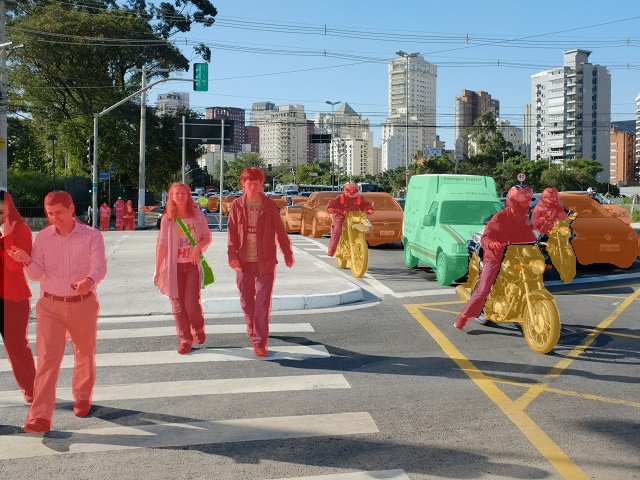

In [13]:
# find the output file and display it
image_file = list(Path('./runs/segment/example4').glob('Sao-Paulo*.jpg'))[0]
display(Image(filename=image_file))

That looks like it improved the result.

# Pose Estimation
YOLO also has the ability to estimate poses in datasets. You can read more about it here: https://docs.ultralytics.com/tasks/pose/. But let's try it out on a new image.

100% 85.3M/85.3M [00:00<00:00, 217MB/s]
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-pose summary (fused): 287 layers, 44465580 parameters, 0 gradients, 168.6 GFLOPs

100% 42.4k/42.4k [00:00<00:00, 5.33MB/s]
image 1/1 /content/maryland-virginia-football-768x512.jpg: 448x640 7 persons, 105.0ms
Speed: 7.6ms preprocess, 105.0ms inference, 565.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/pose/example5
💡 Learn more at https://docs.ultralytics.com/modes/predict


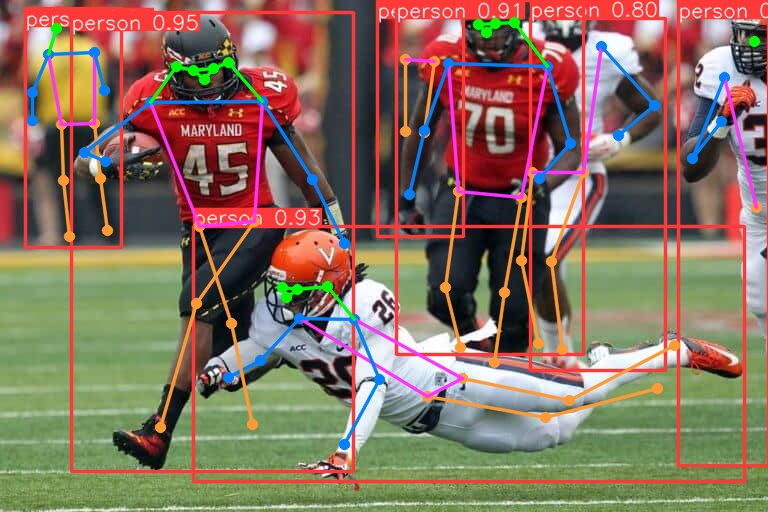

In [14]:
# test on an image with YOLOv8n
!yolo mode=predict task=pose model=yolov8l-pose.pt name='example5' source='https://fbschedules.com/wp-content/uploads/2017/01/maryland-virginia-football-768x512.jpg'
# find the output file and display it
image_file = list(Path('./runs/pose/example5').glob('maryland-virginia*'))[0]
display(Image(filename=image_file))

# Using your own data
The default models here were trained on the COCO dataset. This has 80 categories of common objects, but it does not encompass everything that we might see. Therefore, adapting this model to new data is particularly useful and powerful. Let's explore a quick example doign this. Here I downloaded a public dataset of thermal images of humans and dogs from Roboflow (https://public.roboflow.com/object-detection/thermal-dogs-and-people).

The general process to do this can be found here: https://docs.ultralytics.com/modes/train/

In [15]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


My dataset is in a folder `/content/drive/ThermalDogsAndPeople`, yours could be in a different folder.

Let's look at the data first. There is a configuration file `data.yaml` that describes our data. Here we have two classes: 'dog' and 'person'.

Here is the conntent of `data.yaml`:
```
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['dog', 'person']

roboflow:
  workspace: joseph-nelson
  project: thermal-dogs-and-people
  version: 1
  license: Public Domain
  url: https://universe.roboflow.com/joseph-nelson/thermal-dogs-and-people/dataset/1
```

The `train`, `val`, and `test` entries correspond to the folders where our data lives. Each folder includes subfolders `labels` and `images` where each image files has a corresponding matching label file with the same name, but ending in `.txt`

The `nc` entry is the number of classes in this dataset. We have two: `dog` and `person`.

The `roboflow` entry contains metadata about the dataset.

Before we try something fancy, lets try to see how a default YOLO model performs on this data.

In [16]:
! yolo mode=predict task=detect model=yolov8n.pt save_txt save_conf exist_ok name='example6' source='/content/drive/MyDrive/ThermalDogsAndPeople/test/images/IMG_0006 5_jpg.rf.cd46e6a862d6ffb7fce6795067ce7cc7.jpg'

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/drive/MyDrive/ThermalDogsAndPeople/test/images/IMG_0006 5_jpg.rf.cd46e6a862d6ffb7fce6795067ce7cc7.jpg: 640x640 1 bottle, 10.1ms
Speed: 4.4ms preprocess, 10.1ms inference, 721.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/example6
1 label saved to runs/detect/example6/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


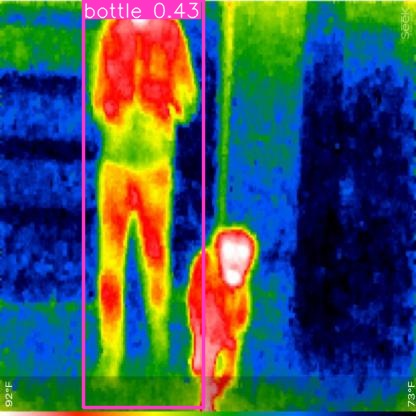

In [17]:
# find the output file and display it
image_file = list(Path('./runs/detect/example6').glob('IMG*.jpg'))[0]
display(Image(filename=image_file))

Oops, that didn't work so well. Let's see if we can improve the result be refining our model.

In [18]:
# let's try to train
! yolo task=detect mode=train model=yolov8n.pt epochs=10 imgsz=640 data=/content/drive/MyDrive/ThermalDogsAndPeople/data.yaml


Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/ThermalDogsAndPeople/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

This is a very short amount of training, and is not realistic in practice. Our model will perform better if we trained it for longer. However, let's now try the same image with our trained model.

In [19]:
! yolo mode=predict task=detect model=runs/detect/train/weights/best.pt save_txt save_conf exist_ok name='example7' source='/content/drive/MyDrive/ThermalDogsAndPeople/test/images/IMG_0006 5_jpg.rf.cd46e6a862d6ffb7fce6795067ce7cc7.jpg'

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/ThermalDogsAndPeople/test/images/IMG_0006 5_jpg.rf.cd46e6a862d6ffb7fce6795067ce7cc7.jpg: 640x640 1 dog, 1 person, 10.6ms
Speed: 5.1ms preprocess, 10.6ms inference, 698.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/example7
1 label saved to runs/detect/example7/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict


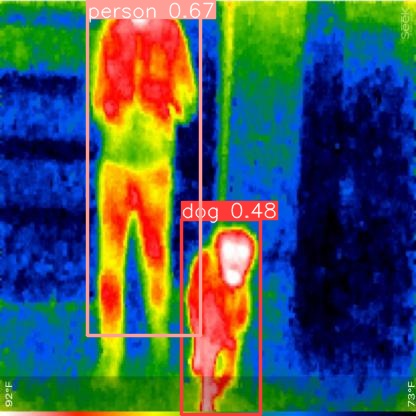

In [20]:
# find the output file and display it
image_file = list(Path('./runs/detect/example7').glob('IMG*.jpg'))[0]
display(Image(filename=image_file))

With just a little fine tuning, we were able to get better results. With the right amount of data, you will be able to apply these algorithms to many new problems. The biggest challenge you will face will likely be obtaining, curating, and labeling data. This will be specific to the domain of your problem.

## Getting Labels for Your Data

There exist several tools to help you with labeling your data. One is the website Roboflow (https://roboflow.com) and there exist tools you can run localling, like Yolo_Label (https://github.com/developer0hye/Yolo_Label) and Label Studio (https://github.com/heartexlabs/label-studio). There are invariably many other tools that exist.

## Segment Anything Model

A promising new approach is to utilize a foundation model for image segmentation such as Meta's Segment Anything (https://segment-anything.com/). This model can identify objects within images and be used to define segmented regions and/or bounding boxes, and this can be used to automate a human-in-the-loop active learning pipeline to label images. Let's try it from YOLO (https://docs.ultralytics.com/models/sam/)

In [21]:
# try the Segment Anything Model
from ultralytics import SAM
model = SAM('sam_l.pt')
model.info()  # display model information
sam_result = model.predict(name='example8', save=True, show_labels=False, show_boxes=False, source='https://fbschedules.com/wp-content/uploads/2017/01/maryland-virginia-football-768x512.jpg')  # predict

100%|██████████| 1.16G/1.16G [00:04<00:00, 259MB/s]


Model summary: 358 layers, 312342832 parameters, 312342832 gradients

Found https://fbschedules.com/wp-content/uploads/2017/01/maryland-virginia-football-768x512.jpg locally at maryland-virginia-football-768x512.jpg
image 1/1 /content/maryland-virginia-football-768x512.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59, 1 60, 1 61, 1 62, 1 63, 1 64, 1 65, 1 66, 1 67, 1 68, 1 69, 1 70, 1 71, 1 72, 1 73, 1 74, 1 75, 1 76, 1 77, 1 78, 1 79, 1 80, 1 81, 1 82, 1 83, 1 84, 1 85, 1 86, 1 87, 1 88, 1 89, 1 90, 1 91, 1 92, 1 93, 1 94, 1 95, 1 96, 1 97, 1 98, 1 99, 1 100, 1 101, 1 102, 1 103, 1 104, 1 105, 1 106, 1 107, 1 108, 1 109, 1 110, 1 111, 1 112, 1 113, 1 114, 1 115, 1 116, 1 117,

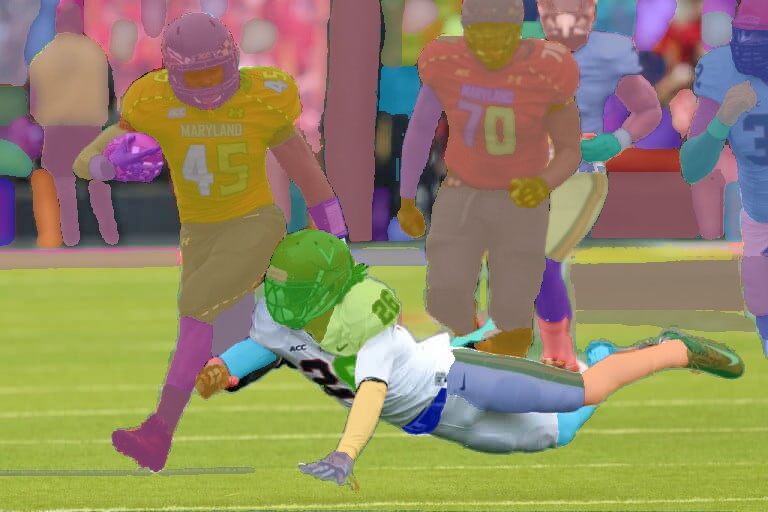

In [22]:
# now find the output file and display it
image_file = list(Path('./runs/segment/example8').glob('*.jpg'))[0]
display(Image(filename=image_file))

The interesting and exciting thing about the Segment Anything foundation model is that it is not trained to detect specific objects of any class, but rather any distinct object in an image. This means that it can be used in a manner to potentially automatically label images. In particular this tool could be very useful to take an object detection dataset and make it into a segmentation dataset. Additionally, it is much less work for a human to perform object detection compared to segmentation. This automatic annotation approach approach is rapidly being developed in the field. For example, see this: https://docs.ultralytics.com/models/sam/

## Vision-Language Models

Another interesting approach is the use of multi-modal models. While we didn't have time to go deeply into this in our lecture, these models allow the use of open vocabulary for object classes. Using a strategy based on the concept of Contrastive Language-Image Pretraining (CLIP) proposed by OpenAI in 2021 (https://openai.com/index/clip/), we do not necessarily need to know the explicit class of our object, which can reduce the need for training bespoke models. Note that this concept is used in all modern multi-modal large language models like GPT-4o, Claude, and Gemini.

Let's try out a smaller implementation called YOLO-World: https://docs.ultralytics.com/models/yolo-world/

In [23]:
from ultralytics import YOLOWorld

# Initialize a YOLO-World model
model = YOLOWorld("yolov8s-world.pt")  # or select yolov8m/l-world.pt for different sizes

# Execute inference with the YOLOv8s-world model on the specified image
results = model.predict(name='example9', save=True, save_txt=True, source="https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg")

100%|██████████| 25.9M/25.9M [00:00<00:00, 219MB/s]



Found https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg locally at Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg
image 1/1 /content/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg: 480x640 16 persons, 1 bicycle, 4 cars, 3 motorcycles, 1 truck, 2 traffic lights, 1 handbag, 112.9ms
Speed: 1.5ms preprocess, 112.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/example9
1 label saved to runs/detect/example9/labels


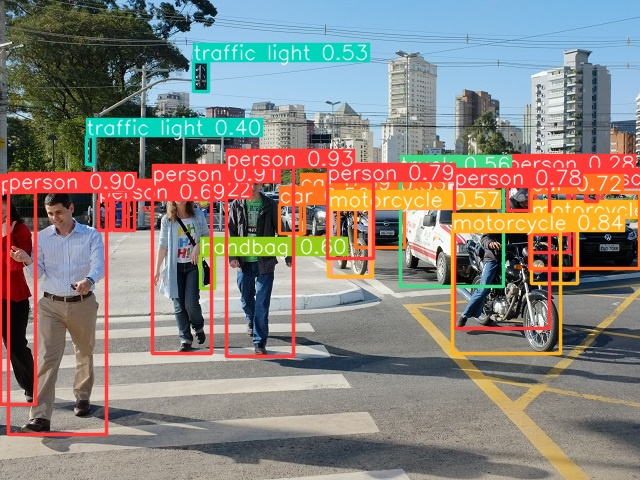

In [24]:
# find the output file
image_file = list(Path('./runs/detect/example9').glob('Sao-Paulo*.jpg'))[0]
# display it
display(Image(filename=image_file))

This also saves a file with all of the detected labels.

We can also specify which classes we want to find. Let's try it:

In [25]:
model.set_classes(["shoe", "belt","handbag"])

# Execute prediction for specified categories on an image
results = model.predict(name='example10', save=True, save_txt=True, source="https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg")

requirements: Ultralytics requirement ['git+https://github.com/ultralytics/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/ultralytics/CLIP.git to /tmp/pip-req-build-ah9_0zk4
  Resolved https://github.com/ultralytics/CLIP.git to commit fa20ebf554d1e77513171174124b1cd271497253
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.0 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1380678 sha256=e2f7cd7cbe05761a48c87355b33c73499db63a485c0f7838dee03449b8926b44
  Stored in directory: /tmp/pip-ephem-wheel-cache-rupi9bsz/wheels/2e/25/92/e26f2a227599930e19a8188891e9600b6dd36721a0f8d6ef40
Successfully built clip

requirements: AutoUpdate success ✅ 8.9s, installed 1 package: ['git+https://github.com/ultralytics/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 56.8MiB/s]



Found https://thecityfix.com/wp-content/uploads/2013/11/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg locally at Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg
image 1/1 /content/Sao-Paulo-pedestrian-cross-walk-Fred-Inklaar-640x480.jpg: 480x640 6 shoes, 1 belt, 1 handbag, 23.9ms
Speed: 1.7ms preprocess, 23.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/example10
1 label saved to runs/detect/example10/labels


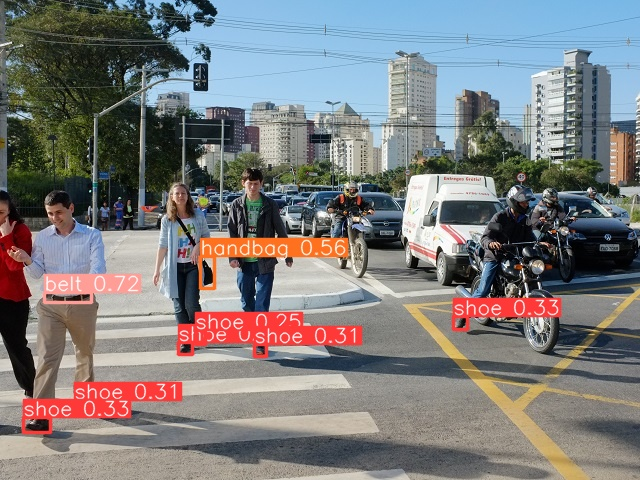

In [26]:
# find the output file
image_file = list(Path('./runs/detect/example10').glob('Sao-Paulo*.jpg'))[0]
# display it
display(Image(filename=image_file))

This brings a large degree of capability to object detection without the need for customization of an entire model. It could also be used to help rapidly create a dataset for conventional supervised training.

# Finish Line
This completes this exercise and survey of computer vision for object detection and segmentation. Computer vision is a fast moving field and there are many great tools that are available. This will hopefully get you started. Good luck!